In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

from scipy.stats import gaussian_kde as kde

### Rate vs. substrate/enzyme with four days' data

**Substrate**

In [7]:
Substrate_40 = pd.read_csv('Substrate_40.csv',index_col = 0)
Substrate_Grid_40 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Substrate_Grid_40[i-1] = Substrate_40.iloc[(2 + 12*(i-1)),0]

Substrate_80 = pd.read_csv('Substrate_80.csv',index_col = 0)
Substrate_Grid_80 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Substrate_Grid_80[i-1] = Substrate_80.iloc[(2 + 12*(i-1)),0]

Substrate_120 = pd.read_csv('Substrate_120.csv',index_col = 0)
Substrate_Grid_120 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Substrate_Grid_120[i-1] = Substrate_120.iloc[(2 + 12*(i-1)),0]
        
Substrate_160 = pd.read_csv('Substrate_160.csv',index_col = 0)
Substrate_Grid_160 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Substrate_Grid_160[i-1] = Substrate_160.iloc[(2 + 12*(i-1)),0]
        
        
Substrate_200 = pd.read_csv('Substrate_200.csv',index_col = 0)
Substrate_Grid_200 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Substrate_Grid_200[i-1] = Substrate_200.iloc[(2 + 12*(i-1)),0]

In [8]:
Substrate = np.concatenate([Substrate_Grid_40,Substrate_Grid_80,Substrate_Grid_120,
                           Substrate_Grid_160,Substrate_Grid_200])
Substrate.shape

(50000, 1)

**Enzyme**

In [9]:
Enzyme_40 = pd.read_csv('Enzyme_40.csv',index_col = 0)
Enzyme_Grid_40 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    Enzyme_Grid_40[i-1]  = Enzyme_40.iloc[(2 + 12*(i-1)),]
    

Enzyme_80 = pd.read_csv('Enzyme_80.csv',index_col = 0)
Enzyme_Grid_80 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    Enzyme_Grid_80[i-1]  = Enzyme_80.iloc[(2 + 12*(i-1)),]


Enzyme_120 = pd.read_csv('Enzyme_120.csv',index_col = 0)
Enzyme_Grid_120 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    Enzyme_Grid_120[i-1]  = Enzyme_120.iloc[(2 + 12*(i-1)),]
    

Enzyme_160 = pd.read_csv('Enzyme_160.csv',index_col = 0)
Enzyme_Grid_160 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    Enzyme_Grid_160[i-1]  = Enzyme_160.iloc[(2 + 12*(i-1)),]


Enzyme_200 = pd.read_csv('Enzyme_200.csv',index_col = 0)
Enzyme_Grid_200 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    Enzyme_Grid_200[i-1]  = Enzyme_200.iloc[(2 + 12*(i-1)),]

In [10]:
Enzyme = np.concatenate([Enzyme_Grid_40,Enzyme_Grid_80,Enzyme_Grid_120,Enzyme_Grid_160,Enzyme_Grid_200])
Enzyme.shape

(50000, 1)

**Rate**

In [11]:
Rate_40 = pd.read_csv('DecayRates_40.csv',index_col = 0)
Rate_Grid_40 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid_40[i-1] = Rate_40.iloc[(2 + 12*(i-1)),]
        

Rate_80 = pd.read_csv('DecayRates_80.csv',index_col = 0)
Rate_Grid_80 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid_80[i-1] = Rate_80.iloc[(2 + 12*(i-1)),]
        

Rate_120 = pd.read_csv('DecayRates_120.csv',index_col = 0)
Rate_Grid_120 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid_120[i-1] = Rate_120.iloc[(2 + 12*(i-1)),]

Rate_160 = pd.read_csv('DecayRates_160.csv',index_col = 0)
Rate_Grid_160 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid_160[i-1] = Rate_160.iloc[(2 + 12*(i-1)),]
        

Rate_200 = pd.read_csv('DecayRates_200.csv',index_col = 0)
Rate_Grid_200 = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid_200[i-1] = Rate_200.iloc[(2 + 12*(i-1)),]

In [12]:
Rate = np.concatenate([Rate_Grid_40,Rate_Grid_80,Rate_Grid_120,Rate_Grid_160,Rate_Grid_200])
Rate.shape

(50000, 1)

**Put substrate,enzyme, and rate in one dataframe**

In [13]:
Rate_Sub_Enz_array = np.concatenate([Rate,Substrate,Enzyme], axis = 1)
Rate_Sub_Enz_df    = pd.DataFrame(data = Rate_Sub_Enz_array,
                                  columns = ['Rate','Substrate','Enzyme'])
Rate_Sub_Enz_df.shape
#Rate_Sub_Enz_df.to_csv('Rate_Sub_Enz_4_Day.csv')

(50000, 3)

In [14]:
Rate_Sub_Enz_df.head()

,Rate,Substrate,Enzyme
0,0.0,147.2924,0.0
1,0.0,147.2924,0.0
2,0.0,147.2924,0.0
3,0.0,147.2924,0.0
4,0.0,147.2924,0.0


In [15]:
Grid_average = Rate_Sub_Enz_df.groupby(Rate_Sub_Enz_df.index//10000).mean()
Grid_average.index = [40,80,120,160,200]
Grid_average

,Rate,Substrate,Enzyme
40,0.002040,147.249501,0.000137
80,0.010714,147.044763,0.000723
120,0.227603,144.471245,0.015430
160,3.030471,85.228595,0.283018
200,0.535349,4.463520,0.521817


In [16]:
def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize(vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='autumn').to_rgba( val ) for val in vals]

    return colours

In [17]:
x_sub =  Rate_Sub_Enz_df['Substrate']
x_sub.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    50000.000000
mean       105.691525
std         59.203134
min          0.000029
10%          0.313082
25%         53.446923
50%        146.805002
75%        147.292400
90%        147.292400
max        147.292400
Name: Substrate, dtype: float64

In [18]:
# Sub_index = Rate_Sub_Enz_df['Enzyme'] <= (max(Rate_Sub_Enz_df['Enzyme']) - min(Rate_Sub_Enz_df['Enzyme'])) * 0.25 + min(Rate_Sub_Enz_df['Enzyme'])
# Sub_RMM = Rate_Sub_Enz_df['Substrate'][Sub_index]
# Sub_RMM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

In [19]:
def ECA(Substrate,Enzyme):
    Vmax = 18.722295 
    K    = 36.721782
    
    Rate = Vmax*Substrate*Enzyme/(K+ Substrate+Enzyme)
    
    return Rate

In [21]:
# predicted rate 
Rate_ECA1 = ECA(Rate_Sub_Enz_df['Substrate'],Rate_Sub_Enz_df['Enzyme'])

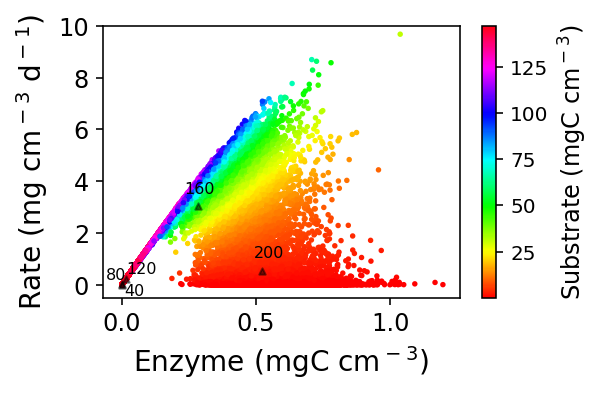

In [56]:
#x = np.arange(0,1.20,0.01)
#y_min = 0.19498 * 105.691525 * x /(1.51204+x)
#y_max = 0.19498 * 105.691525 * x /(1.51204+x)

fig, ax = plt.subplots(figsize=(4,2.5))


#xx = (Rate_Sub_Enz_df[['Enzyme','Rate']].T).values
#densObj = kde(xx)
#colours = makeColours(densObj.evaluate(xx))

sd = ax.scatter(Rate_Sub_Enz_df['Enzyme'],Rate_Sub_Enz_df['Rate'],s=3,c=Rate_Sub_Enz_df['Substrate'],cmap='hsv')#color=colours)
#ax.plot(x,y_min, color = 'k',linewidth = 2,linestyle = '-',alpha = 0.5)
#ax.scatter(Rate_Sub_Enz_df['Enzyme'],Rate_ECA1,s=2,color='grey',alpha=0.2)
ax.scatter(Grid_average['Enzyme'],Grid_average['Rate'],s=10,marker='^',color='black',alpha = 0.5)

xtext = [-0.01,0.06,0,0.05,0.03]
ytext = [-0.4,0.2,0.2,0.5,0.5]

for i in range(Grid_average.shape[0]):
    ax.annotate(Grid_average.index[i], xy=(Grid_average['Enzyme'].iloc[i],Grid_average['Rate'].iloc[i]),
                xytext=(Grid_average['Enzyme'].iloc[i]-xtext[i],Grid_average['Rate'].iloc[i]+ytext[i]),
                fontsize=8)


ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-0.5,10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)
cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

plt.savefig('Cellulose_Rate_Enzyme.pdf',bbox_inches='tight')

# ECA fit

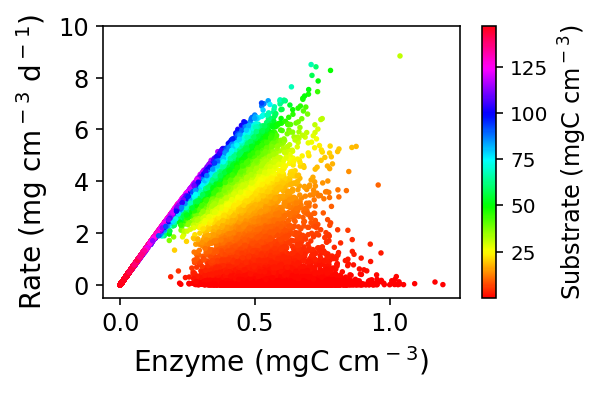

In [57]:
fig, ax = plt.subplots(figsize=(4,2.5))

sd = ax.scatter(Rate_Sub_Enz_df['Enzyme'],Rate_ECA1,s=3,c=Rate_Sub_Enz_df['Substrate'],cmap='hsv')#color='grey',alpha=0.2)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-0.5,10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)
cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

plt.savefig('Cellulose_Rate_Enzyme_ECA.pdf',bbox_inches='tight')

In [27]:
x_enz = Rate_Sub_Enz_df['Enzyme']
x_enz.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    50000.000000
mean         0.164225
std          0.227455
min          0.000000
10%          0.000000
25%          0.000000
50%          0.007520
75%          0.358022
90%          0.531106
max          1.196819
Name: Enzyme, dtype: float64

In [28]:
# Enz_index = Rate_Sub_Enz_df['Substrate'] <= (max(Rate_Sub_Enz_df['Substrate']) -min(Rate_Sub_Enz_df['Substrate'])) * 0.15 + min(Rate_Sub_Enz_df['Substrate'])
# Enz_MM = Rate_Sub_Enz_df['Enzyme'][Enz_index]
# Enz_MM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

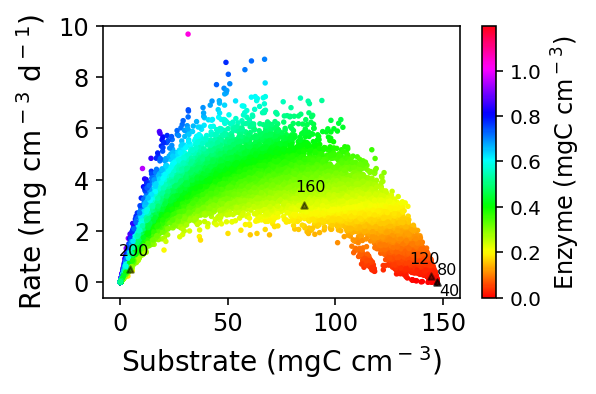

In [53]:
#x = np.arange(0,150,1)

#y_min = 11.68 *   0.074827 * x/(13.09 + x)
#y_mid = 19.13 *   0.074827 * x/(21.44 + x)
#y_max = 36.72 *   0.074827 * x/(41.16 + x)


fig, ax = plt.subplots(figsize=(4,2.5))


#yy = (Rate_Sub_Enz_df[['Substrate','Rate']].T).values
#densObj = kde(yy)
#colours = makeColours(densObj.evaluate(yy))


sd=ax.scatter(x=Rate_Sub_Enz_df['Substrate'],y=Rate_Sub_Enz_df['Rate'],s=3,c=Rate_Sub_Enz_df['Enzyme'],cmap='hsv')#color=colours,zorder=1)

#ax.plot(x,y_min,color='grey',linewidth = 2,linestyle = '-',alpha = 0.5)
#ax.plot(x,y_mid,color='grey',linewidth = 2,linestyle = '-',alpha = 0.5)
#ax.plot(x,y_max,color='grey',linewidth = 2,linestyle = '-',alpha = 0.5)
#ax.scatter(Rate_Sub_Enz_df['Substrate'],Rate_ECA1,s=2,color='grey',alpha=0.2)
ax.scatter(Grid_average['Substrate'],Grid_average['Rate'],s=10,marker='^',color='black',alpha=0.5)

xtext = [-1,0,10,4,5]
ytext = [-0.5,0.3,0.5,0.5,0.5]

for i in range(Grid_average.shape[0]):
    ax.annotate(Grid_average.index[i], xy=(Grid_average['Substrate'].iloc[i],Grid_average['Rate'].iloc[i]),
                xytext=(Grid_average['Substrate'].iloc[i]-xtext[i],Grid_average['Rate'].iloc[i]+ytext[i]),
                fontsize=8)
    
    
#c=Rate_Sub_Enz_df['Substrate'],cmap = 'plasma'
#ax.fill_between(x, y_min,y_max,facecolor = 'grey',alpha=0.5,zorder=2)

#plt.colorbar(np.array(colours))

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_xlim(-8,158)
ax.set_ylim(-0.6,10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)
cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

plt.savefig('Cellulose_Rate_Substrate.pdf',bbox_inches='tight')

# ECA fit

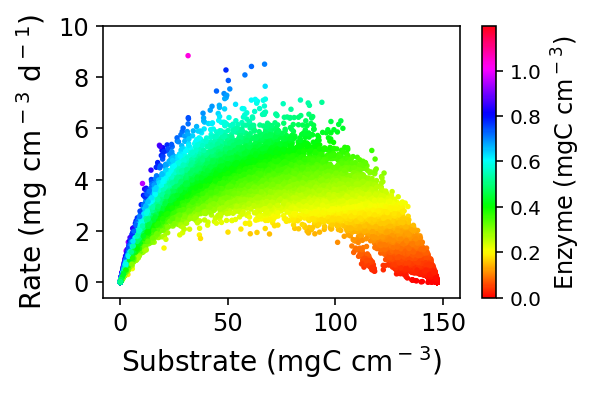

In [55]:
fig, ax = plt.subplots(figsize=(4,2.5))

sd = ax.scatter(Rate_Sub_Enz_df['Substrate'],Rate_ECA1,s=3,c=Rate_Sub_Enz_df['Enzyme'],cmap='hsv')#color='grey',alpha=0.2)

#sd = ax.scatter(Rate_Sub_Enz_df['Substrate'],Rate_ECA1,s=3,c='grey',alpha=1.0)


ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-0.6,10)
ax.set_xlim(-8,158)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)
cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

plt.savefig('Cellulose_Rate_Substrate_ECA.pdf',bbox_inches='tight')